# Exploratory Data Analysis
## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

 - **Most common words** - find these and create word clouds
 - **Size of vocabulary** - look number of unique words and also how quickly someone speaks
 - **Amount of profanity** - most common terms

## Most common word

### Analysis
    for each decade analyse

In [2]:
# Read in the document-term matrix
import pandas as pd

# for the 70"s
data_press_dtm = pd.read_pickle('./data/pickle/decade/press_70_dtm.pkl')
data_press = pd.read_pickle('./data/pickle/decade/press_70.pkl')
data_press_dtm = data_press_dtm.transpose()

# Find the top 30 words said by each press
top_dict = {}
for c in data_press_dtm.columns:
    top = data_press_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
# top_dict

In [3]:
# Print the top 15 words said by each press
# for press, top_words in top_dict.items():
#     print(press)
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words = []
for review in data_press_dtm.columns:
    top = [word for (word, count) in top_dict[review]]
    for t in top:
        words.append(t)

# words

Counter(words).most_common()

# If more than half of the review have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean_70 = pd.read_pickle('./data/pickle/decade/press_70.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_press_70_cv = cv.fit_transform(data_clean_70['texte'])
data_press_70_dtm = pd.DataFrame(data_press_70_cv.toarray(), columns=cv.get_feature_names())
data_press_70_dtm.index = data_clean_70.press


# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_press_70_dtm.to_pickle("././data/pickle/decade/data_press_70_dtm.pkl")

In [8]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=300, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, press in enumerate(data_press_dtm.columns):
    wc.generate(data_clean_70.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_clean_70.press[index])

plt.show()

# Quantité de mot suivant la revue
fig, ax = plt.subplots()
for index, press in data_clean_70.iterrows():
    ax.bar(data_clean_70.press[index], len(data_clean_70.texte[index]), label=data_clean_70.press[index])
    ax.legend()

plt.show()


# For the 80's


In [22]:
# Read in the document-term matrix
import pandas as pd

# for the 70"s
data_press_dtm_80 = pd.read_pickle('./data/pickle/decade/press_80_dtm.pkl')
data_press_80 = pd.read_pickle('./data/pickle/decade/press_80.pkl')
data_press_dtm_80 = data_press_dtm_80.transpose()

# Find the top 30 words said by each press
top_dict_80 = {}
for c in data_press_dtm_80.columns:
    top = data_press_dtm_80[c].sort_values(ascending=False).head(30)
    top_dict_80[c]= list(zip(top.index, top.values))
top_dict_80

{'New York Times': [('mr', 74),
  ('dance', 20),
  ('lets', 16),
  ('songs', 15),
  ('song', 13),
  ('rock', 12),
  ('albums', 11),
  ('pop', 10),
  ('tonight', 10),
  ('audience', 9),
  ('let', 9),
  ('love', 8),
  ('tour', 7),
  ('monsters', 7),
  ('lyrics', 7),
  ('years', 7),
  ('people', 7),
  ('music', 7),
  ('musical', 7),
  ('hes', 6),
  ('world', 6),
  ('video', 5),
  ('persona', 5),
  ('pops', 5),
  ('modern', 5),
  ('played', 5),
  ('sound', 5),
  ('star', 5),
  ('dont', 4),
  ('arrangements', 4)],
 'Rolling Stone': [('song', 14),
  ('iggy', 13),
  ('dance', 11),
  ('monsters', 11),
  ('lets', 10),
  ('love', 10),
  ('scary', 10),
  ('pop', 8),
  ('rodgers', 7),
  ('guitar', 7),
  ('best', 7),
  ('blahblahblah', 7),
  ('rock', 6),
  ('theres', 6),
  ('say', 6),
  ('lp', 6),
  ('hes', 6),
  ('let', 5),
  ('career', 5),
  ('away', 5),
  ('world', 5),
  ('hit', 5),
  ('lodger', 5),
  ('sound', 5),
  ('young', 5),
  ('im', 5),
  ('songs', 5),
  ('ashes', 5),
  ('way', 4),
  ('li

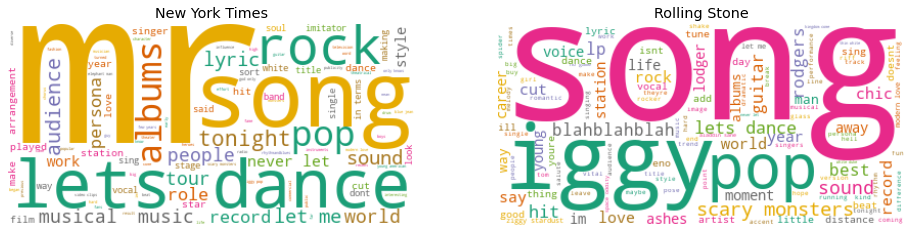

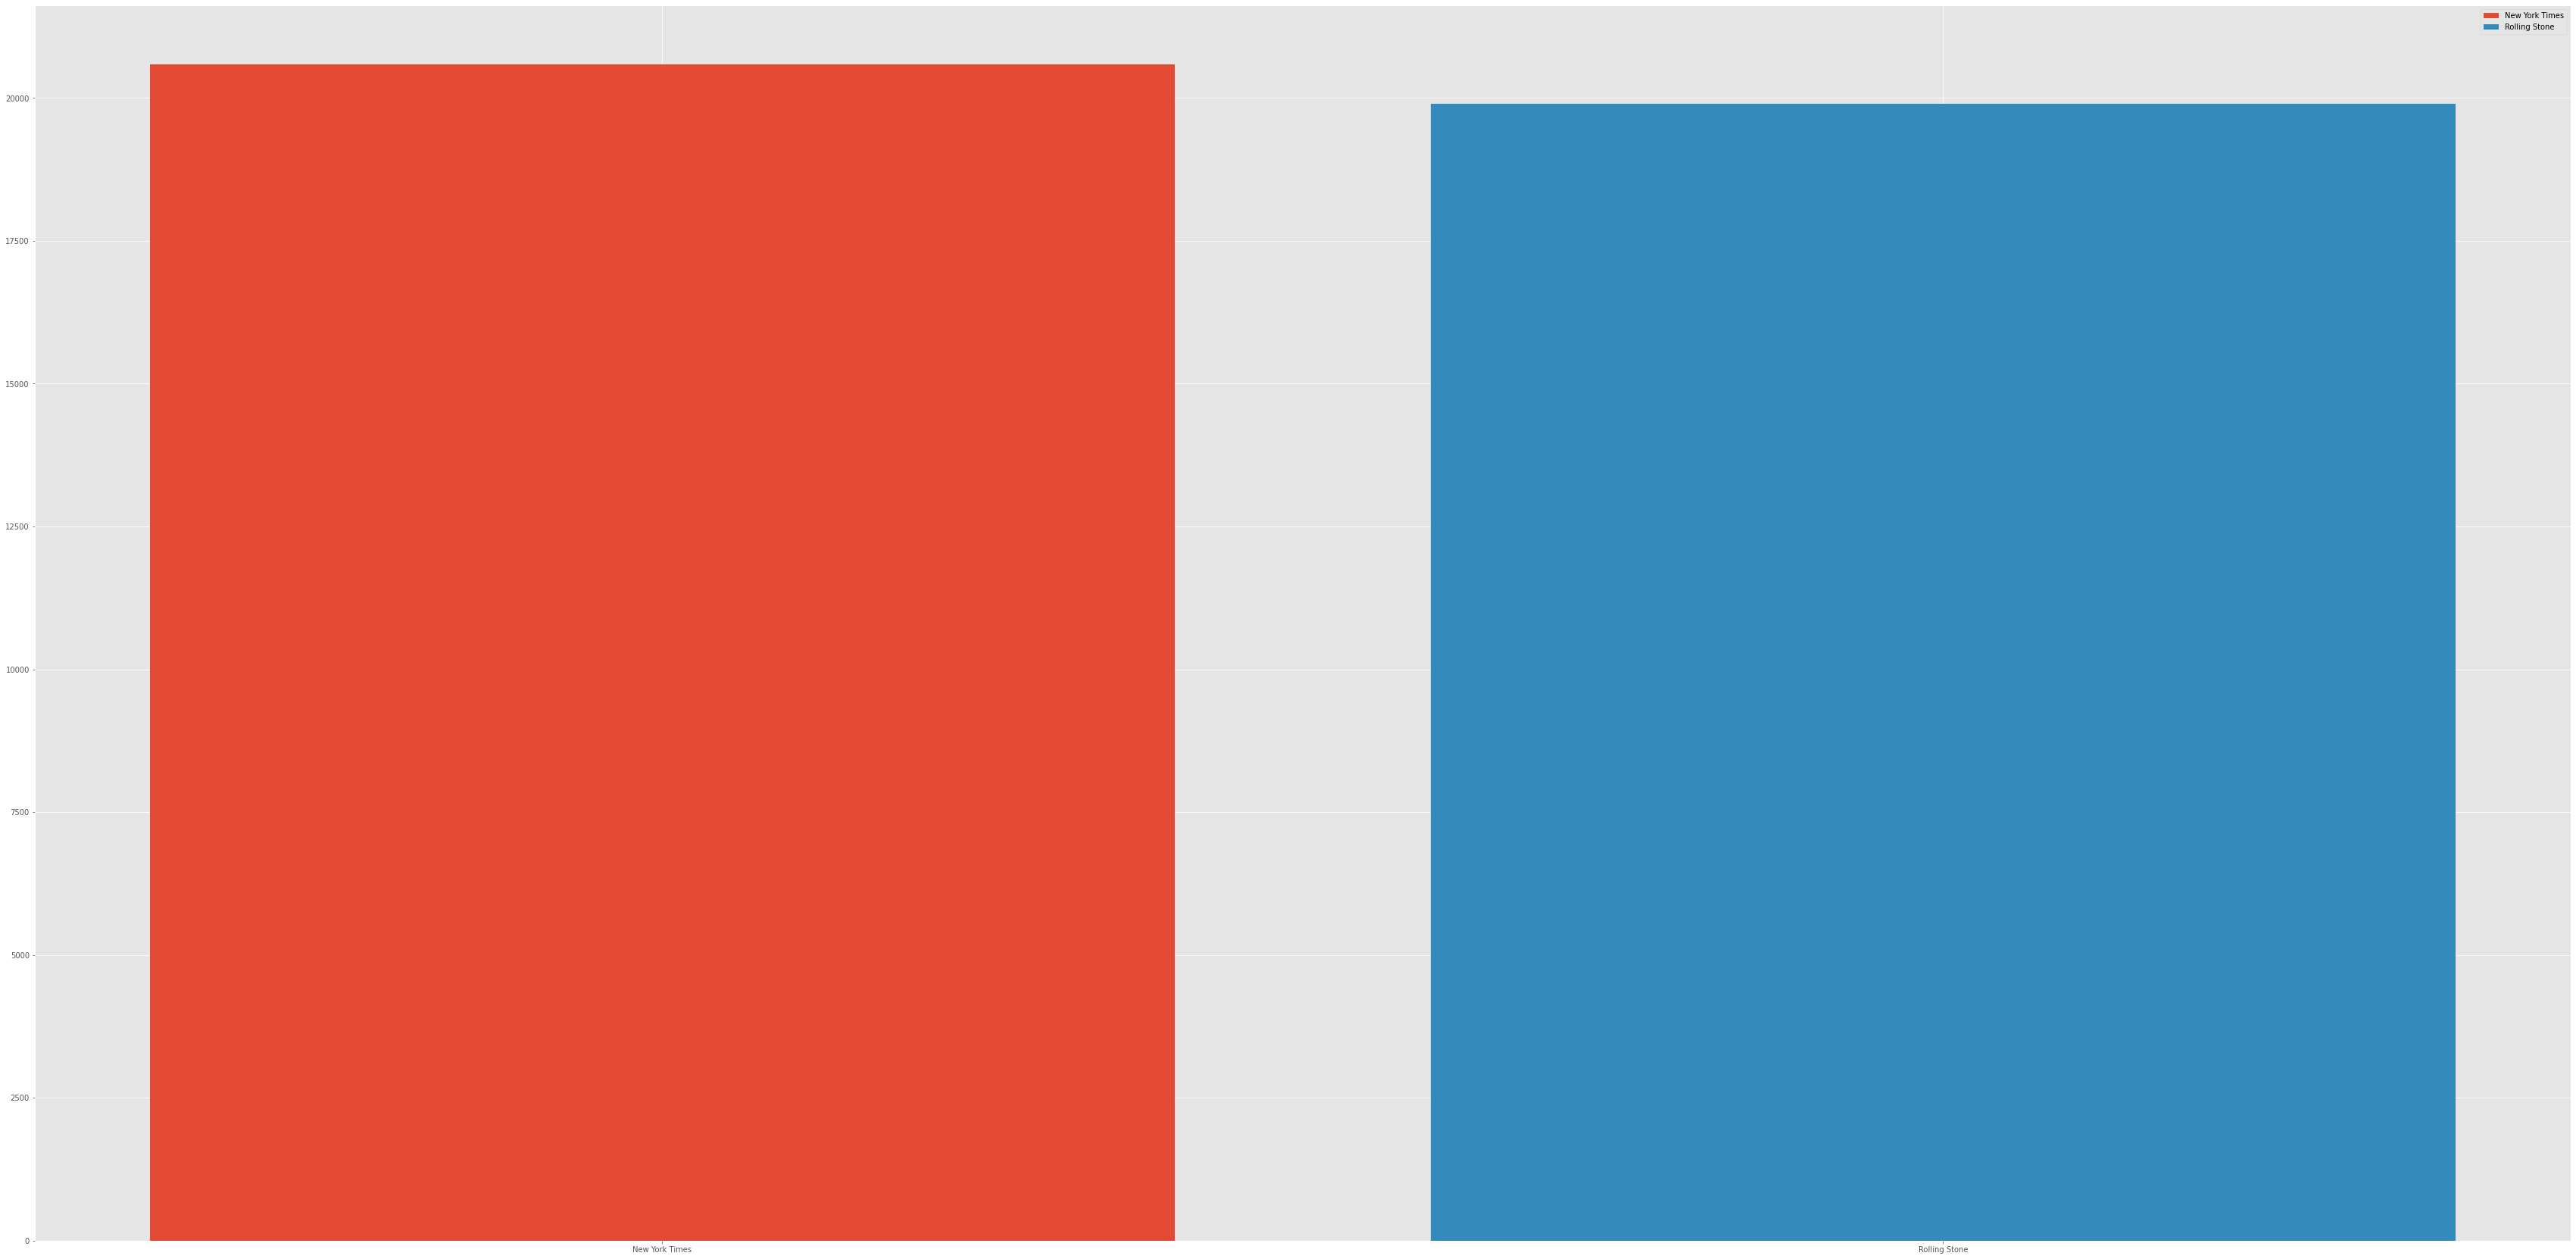

In [32]:
# Print the top 15 words said by each press
# for press, top_words in top_dict_80.items():
#     print(press)
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words_80 = []
for review in data_press_dtm_80.columns:
    top = [word for (word, count) in top_dict_80[review]]
    for t in top:
        words_80.append(t)

# words_80

Counter(words_80).most_common()

# If more than half of the review have it as a top word, exclude it from the list
add_stop_words_80 = [word for word, count in Counter(words_80).most_common() if count > 6]
# add_stop_words_80

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_press_dtm_80.to_pickle("././data/pickle/decade/data_press_80_dtm.pkl")



from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=300, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, press in enumerate(data_press_dtm_80.columns):
    wc.generate(data_press_80.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_press_80.press[index])

plt.show()

# Quantité de mot suivant la revue
fig, ax = plt.subplots()
for index, press in data_press_80.iterrows():
    ax.bar(data_press_80.press[index], len(data_press_80.texte[index]), label=data_press_80.press[index])
    ax.legend()

plt.show()

# For the 90's


In [34]:
# Read in the document-term matrix
import pandas as pd

# for the 70"s
data_press_dtm_90 = pd.read_pickle('./data/pickle/decade/press_90_dtm.pkl')
data_press_90 = pd.read_pickle('./data/pickle/decade/press_90.pkl')
data_press_dtm_90 = data_press_dtm_90.transpose()

# Find the top 30 words said by each press
top_dict_90 = {}
for c in data_press_dtm_90.columns:
    top = data_press_dtm_90[c].sort_values(ascending=False).head(30)
    top_dict_90[c]= list(zip(top.index, top.values))
top_dict_90

{'Miller Freeman Ent.': [('says', 8),
  ('earthling', 7),
  ('wonder', 4),
  ('walker', 4),
  ('little', 4),
  ('rock', 3),
  ('work', 3),
  ('drum', 3),
  ('eno', 3),
  ('great', 3),
  ('single', 3),
  ('record', 3),
  ('ideas', 3),
  ('musical', 3),
  ('bass', 3),
  ('career', 3),
  ('idea', 2),
  ('road', 2),
  ('kyriacou', 2),
  ('enjoy', 2),
  ('ann', 2),
  ('way', 2),
  ('studio', 2),
  ('solo', 2),
  ('brian', 2),
  ('live', 2),
  ('lot', 2),
  ('evident', 2),
  ('band', 2),
  ('theres', 2)],
 'New York Times': [('mr', 65),
  ('music', 11),
  ('said', 10),
  ('outside', 10),
  ('eno', 9),
  ('band', 9),
  ('years', 7),
  ('man', 6),
  ('dance', 6),
  ('began', 5),
  ('song', 5),
  ('make', 5),
  ('lyrics', 5),
  ('pop', 5),
  ('low', 5),
  ('songs', 5),
  ('suede', 5),
  ('albums', 5),
  ('say', 5),
  ('work', 5),
  ('glam', 4),
  ('great', 4),
  ('rock', 4),
  ('garson', 4),
  ('stage', 4),
  ('black', 4),
  ('earthling', 4),
  ('lets', 4),
  ('producer', 4),
  ('fact', 4)],
 '

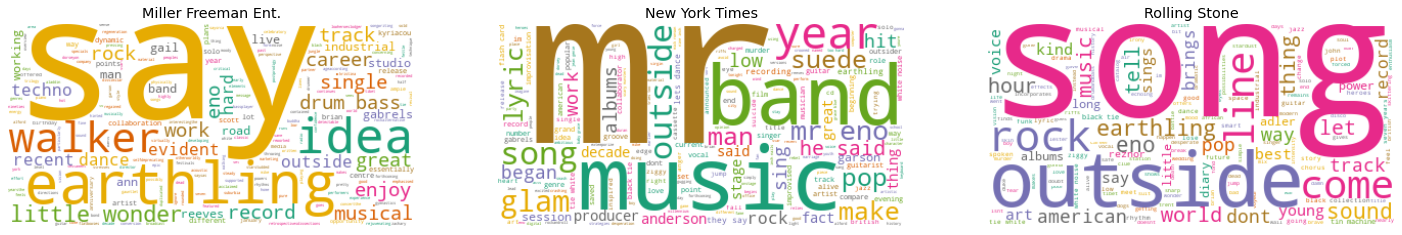

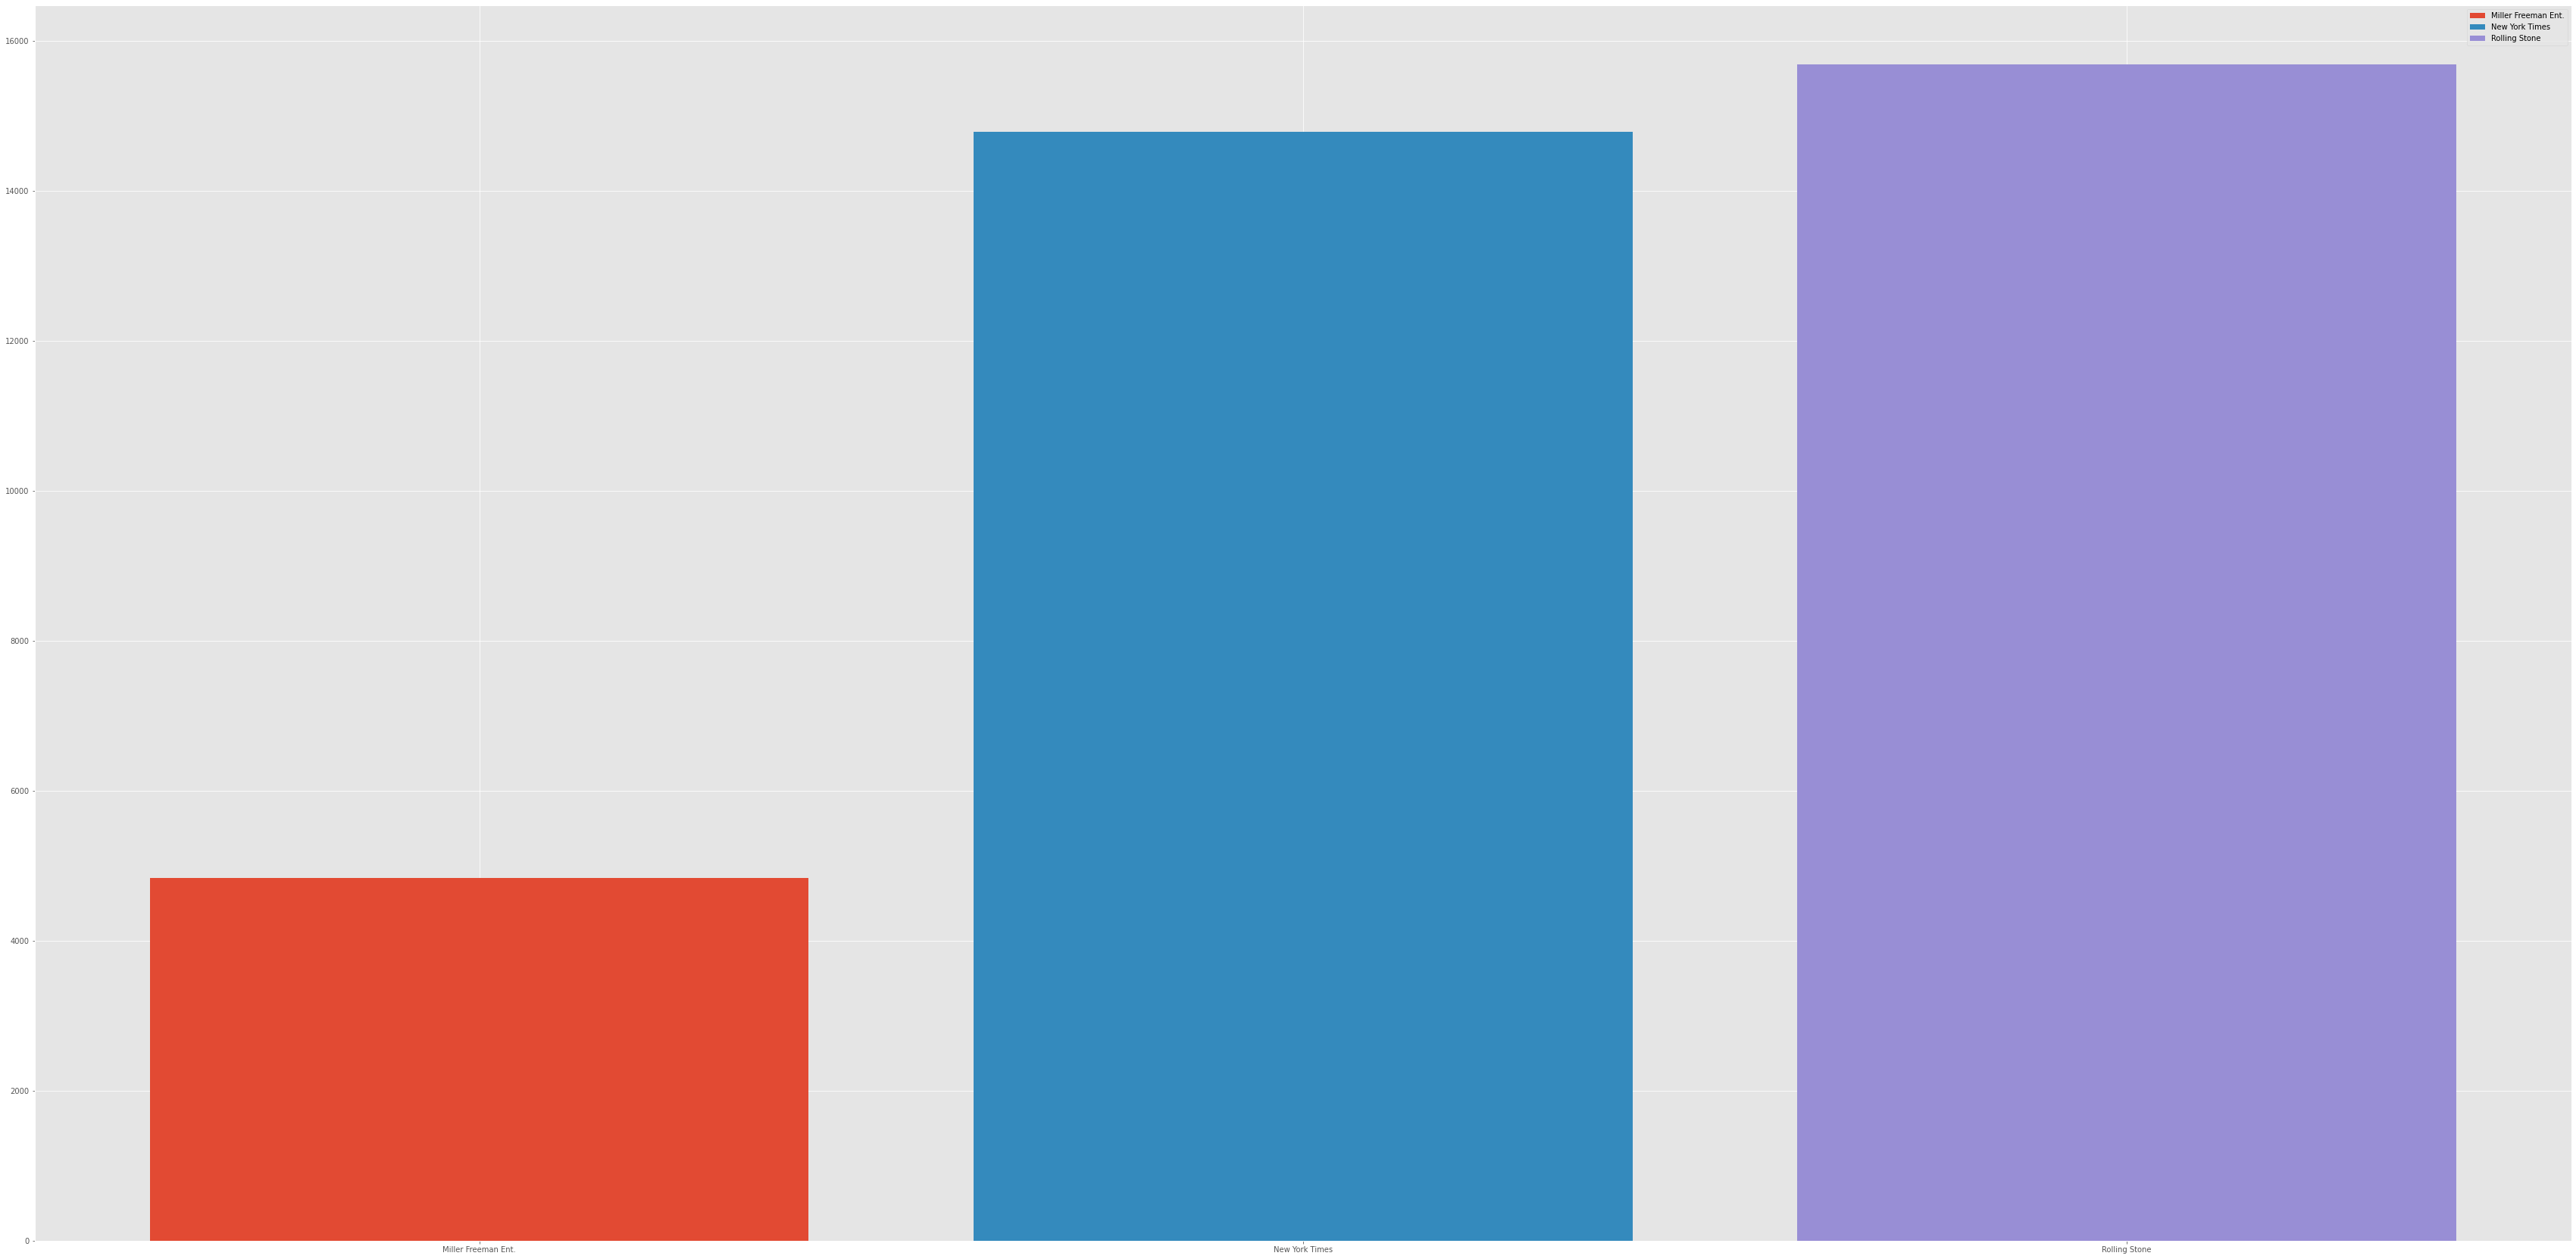

In [37]:
# Print the top 15 words said by each press
# for press, top_words in top_dict_80.items():
#     print(press)
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words_90 = []
for review in data_press_dtm_90.columns:
    top = [word for (word, count) in top_dict_90[review]]
    for t in top:
        words_90.append(t)

# words_90

Counter(words_90).most_common()

# If more than half of the review have it as a top word, exclude it from the list
add_stop_words_90 = [word for word, count in Counter(words_90).most_common() if count > 6]
# add_stop_words_90

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_press_dtm_90.to_pickle("././data/pickle/decade/data_press_90_dtm.pkl")



from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=300, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, press in enumerate(data_press_dtm_90.columns):
    wc.generate(data_press_90.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_press_90.press[index])

plt.show()

# Quantité de mot suivant la revue
fig, ax = plt.subplots()
for index, press in data_press_90.iterrows():
    ax.bar(data_press_90.press[index], len(data_press_90.texte[index]), label=data_press_90.press[index])
    ax.legend()

plt.show()

# For the 00's


In [41]:
# Read in the document-term matrix
import pandas as pd

# for the 00"s
data_press_dtm_00 = pd.read_pickle('./data/pickle/decade/press_00_dtm.pkl')
data_press_00 = pd.read_pickle('./data/pickle/decade/press_00.pkl')
data_press_dtm_00 = data_press_dtm_00.transpose()

# Find the top 30 words said by each press
top_dict_00 = {}
for c in data_press_dtm_00.columns:
    top = data_press_dtm_00[c].sort_values(ascending=False).head(30)
    top_dict_00[c]= list(zip(top.index, top.values))
top_dict_00

{'Miller Freeman Ent.': [('says', 8),
  ('earthling', 7),
  ('wonder', 4),
  ('walker', 4),
  ('little', 4),
  ('rock', 3),
  ('work', 3),
  ('drum', 3),
  ('eno', 3),
  ('great', 3),
  ('single', 3),
  ('record', 3),
  ('ideas', 3),
  ('musical', 3),
  ('bass', 3),
  ('career', 3),
  ('idea', 2),
  ('road', 2),
  ('kyriacou', 2),
  ('enjoy', 2),
  ('ann', 2),
  ('way', 2),
  ('studio', 2),
  ('solo', 2),
  ('brian', 2),
  ('live', 2),
  ('lot', 2),
  ('evident', 2),
  ('band', 2),
  ('theres', 2)],
 'New York Times': [('mr', 65),
  ('music', 11),
  ('said', 10),
  ('outside', 10),
  ('eno', 9),
  ('band', 9),
  ('years', 7),
  ('man', 6),
  ('dance', 6),
  ('began', 5),
  ('song', 5),
  ('make', 5),
  ('lyrics', 5),
  ('pop', 5),
  ('low', 5),
  ('songs', 5),
  ('suede', 5),
  ('albums', 5),
  ('say', 5),
  ('work', 5),
  ('glam', 4),
  ('great', 4),
  ('rock', 4),
  ('garson', 4),
  ('stage', 4),
  ('black', 4),
  ('earthling', 4),
  ('lets', 4),
  ('producer', 4),
  ('fact', 4)],
 '

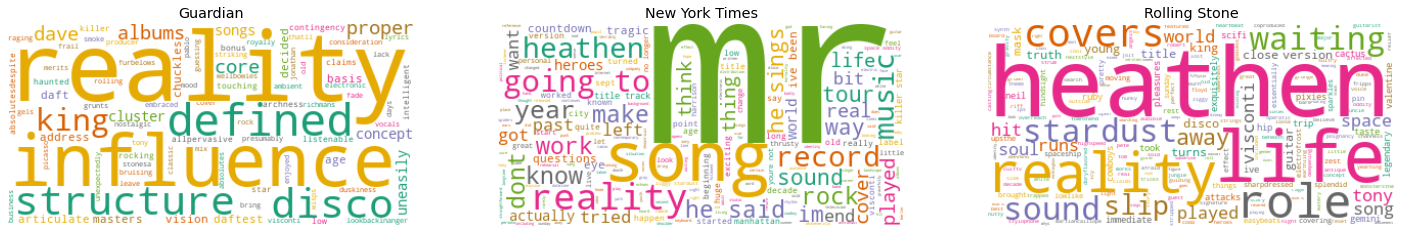

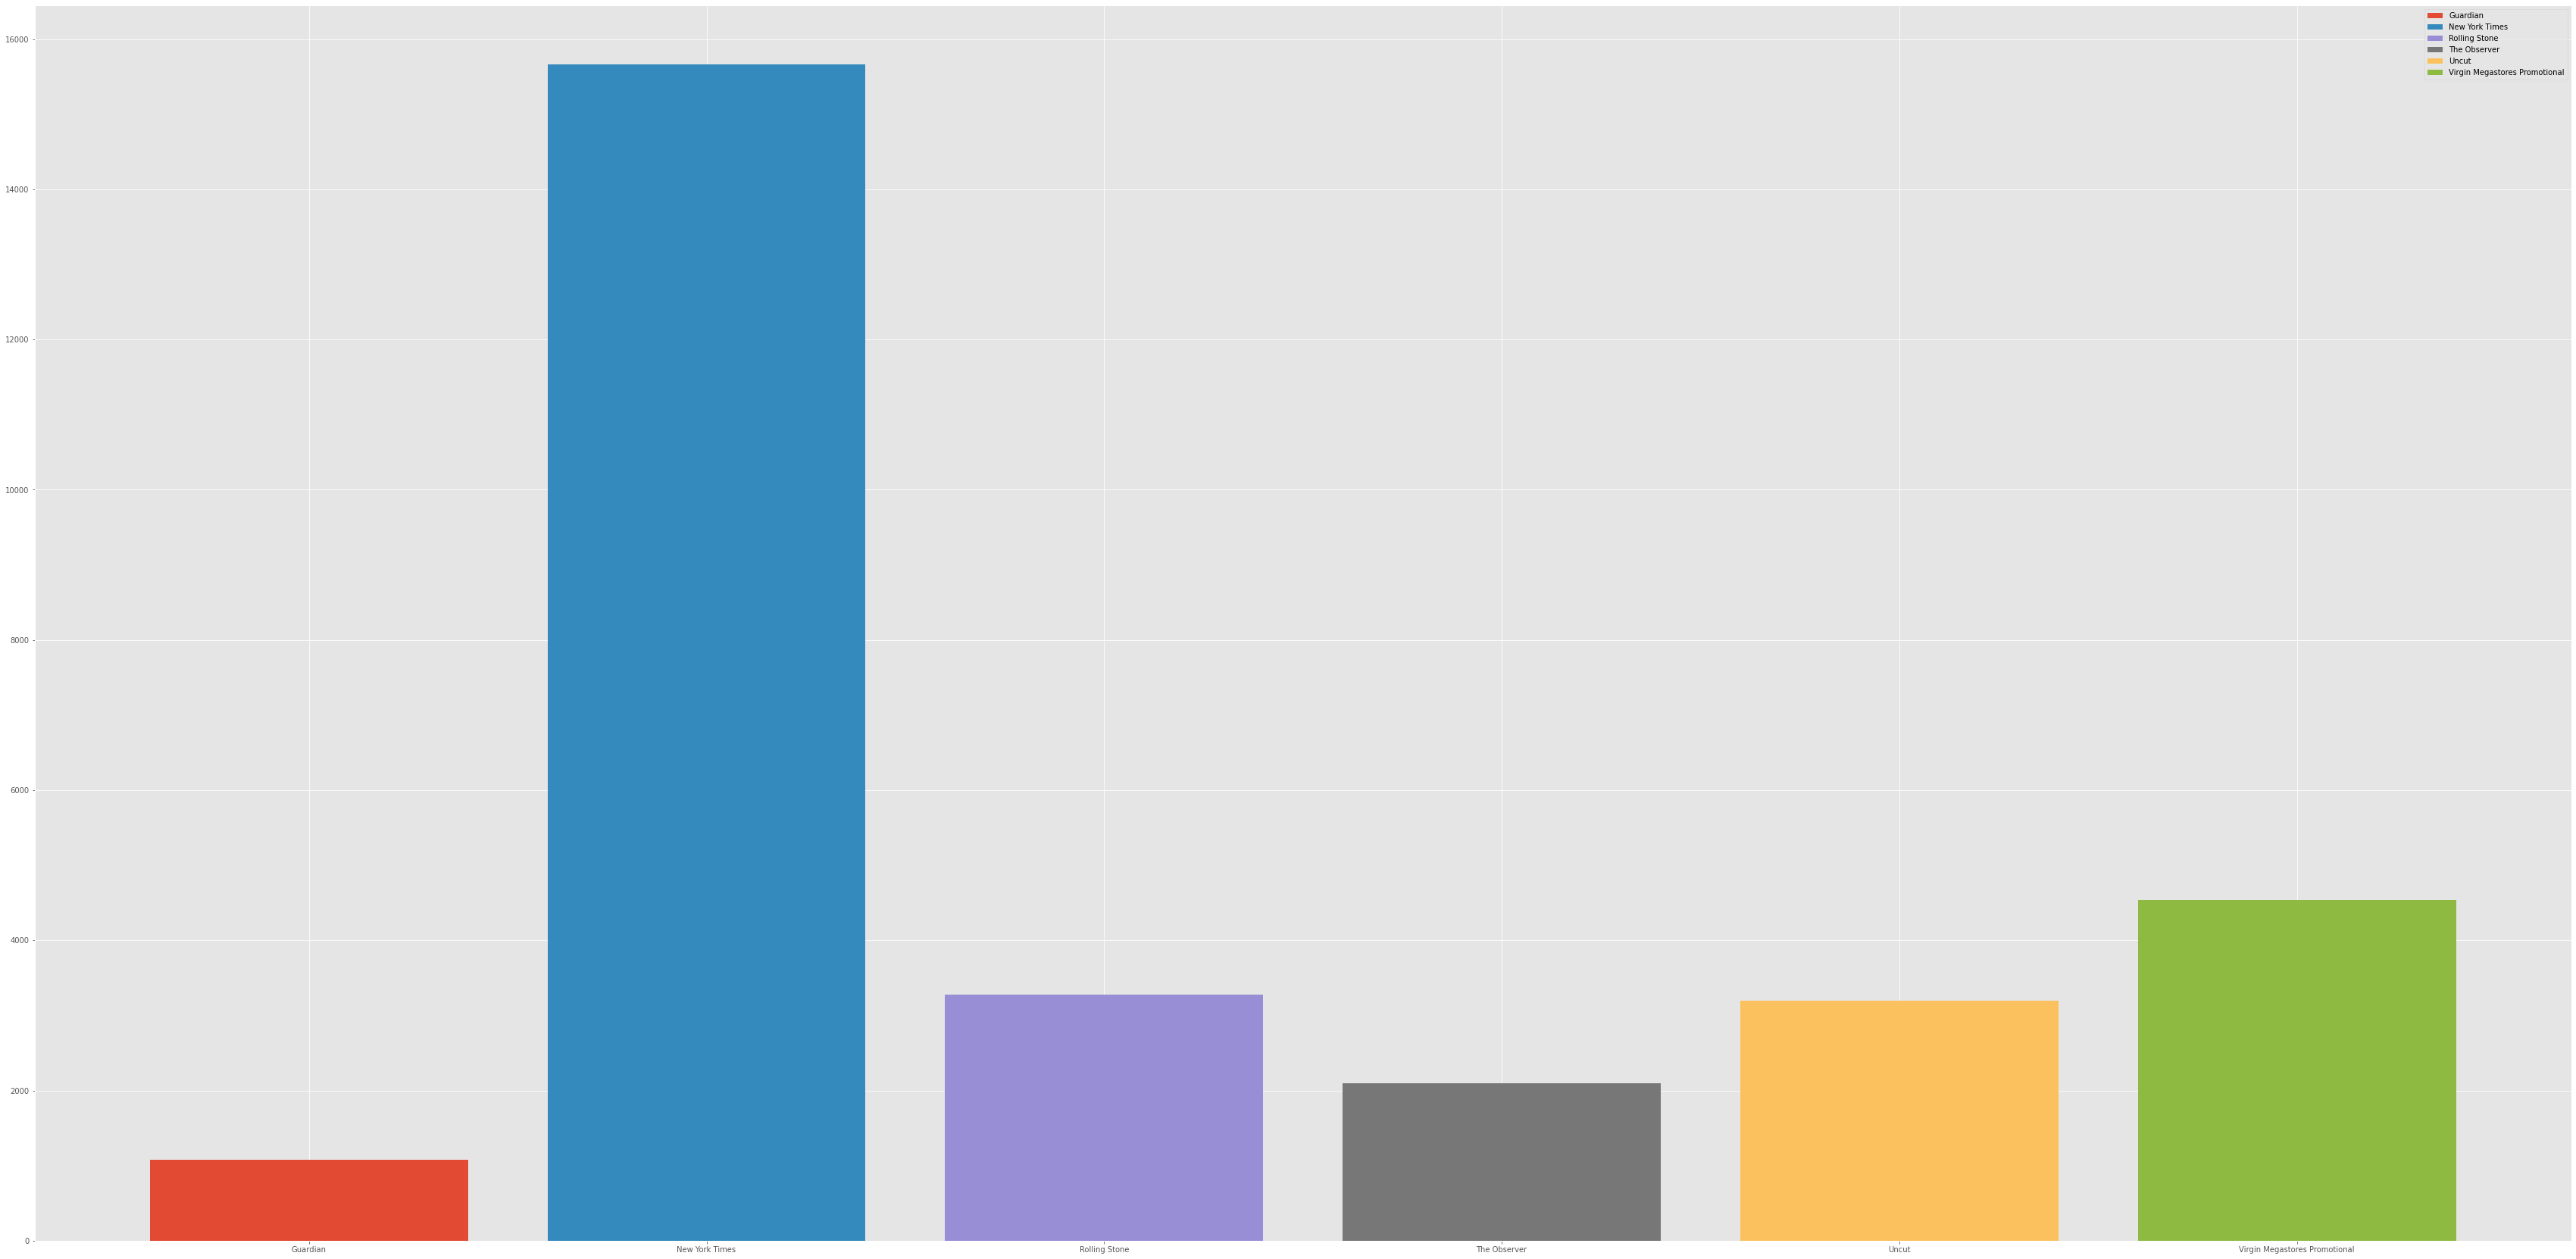

In [47]:
# Print the top 15 words said by each press
# for press, top_words in top_dict_80.items():
#     print(press)
#     print(', '.join([word for word, count in top_words[0:14]]))
#     print('---')


# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each review
words_00 = []
for review in data_press_dtm_00.columns:
    top = [word for (word, count) in top_dict_00[review]]
    for t in top:
        words_00.append(t)

# words_90

Counter(words_00).most_common()

# If more than half of the review have it as a top word, exclude it from the list
add_stop_words_00 = [word for word, count in Counter(words_00).most_common() if count > 6]
# add_stop_words_00

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_press_dtm_00.to_pickle("././data/pickle/decade/data_press_00_dtm.pkl")



from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=1000, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 30]
plt.style.use('ggplot')

for index, press in enumerate(data_press_dtm_00.columns):
    wc.generate(data_press_00.texte[index])
    plt.subplot(3, 7, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_press_00.press[index])

plt.show()

# Quantité de mot suivant la revue
fig, ax = plt.subplots()
for index, press in data_press_00.iterrows():
    ax.bar(data_press_00.press[index], len(data_press_00.texte[index]), label=data_press_00.press[index])
    ax.legend()

plt.show()